In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.dpi'] = 90

In [8]:
df = pd.read_csv('original_dataset.csv', sep = ';')

### Introduction of roll, pitch and module parameters for each accelerometer

In [9]:
df['roll1'] = pd.Series(180/np.pi*(np.arctan2(df['y1'], df['z1'])))
df['pitch1'] = pd.Series(180/np.pi*(np.arctan2(-df['x1'], np.sqrt(np.power(df['y1'], 2) + np.power(df['z1'], 2)))))
df['accel1'] = pd.Series(np.sqrt(np.power(df['x1'], 2) + np.power(df['y1'], 2) + np.power(df['z1'], 2)))

df['roll2'] = pd.Series(180/np.pi*(np.arctan2(df['y2'], df['z2'])))
df['pitch2'] = pd.Series(180/np.pi*(np.arctan2(-df['x2'], np.sqrt(np.power(df['y2'], 2) + np.power(df['z2'], 2)))))
df['accel2'] = pd.Series(np.sqrt(np.power(df['x2'], 2) + np.power(df['y2'], 2) + np.power(df['z2'], 2)))

df['roll3'] = pd.Series(180/np.pi*(np.arctan2(df['y3'], df['z3'])))
df['pitch3'] = pd.Series(180/np.pi*(np.arctan2(-df['x3'], np.sqrt(np.power(df['y3'], 2) + np.power(df['z3'], 2)))))
df['accel3'] = pd.Series(np.sqrt(np.power(df['x3'], 2) + np.power(df['y3'], 2) + np.power(df['z3'], 2)))

df['roll4'] = pd.Series(180/np.pi*(np.arctan2(df['y4'], df['z4'])))
df['pitch4'] = pd.Series(180/np.pi*(np.arctan2(-df['x4'], np.sqrt(np.power(df['y4'], 2) + np.power(df['z4'], 2)))))
df['accel4'] = pd.Series(np.sqrt(np.power(df['x4'], 2) + np.power(df['y4'], 2) + np.power(df['z4'], 2)))

df.head(1)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,...,accel1,roll2,pitch2,accel2,roll3,pitch3,accel3,roll4,pitch4,accel4
0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,-23,...,111.543713,136.548158,41.308515,34.842503,131.496468,-2.062298,138.942434,-144.981829,39.884957,233.918789


#### Remove of x, y, z parameters for each accelerometer

In [29]:
df = df.drop(labels = ['x1', 'y1', 'z1'], axis = 1)
df = df.drop(labels = ['x2', 'y2', 'z2'], axis = 1)
df = df.drop(labels = ['x3', 'y3', 'z3'], axis = 1)
df = df.drop(labels = ['x4', 'y4', 'z4'], axis = 1)

df.head(1)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,class,roll1,pitch1,module1,roll2,pitch2,module2,roll3,pitch3,module3,roll4,pitch4,module4
0,debora,Woman,46,"1,62",75,"28,6",sitting,124.402665,1.541172,111.543713,136.548158,41.308515,34.842503,131.496468,-2.062298,138.942434,-144.981829,39.884957,233.918789


### Given 8 row calculate mean and std for the roll, pitch and module parameters

In [10]:
def make_mean_variance(dataframe):
    new_row = {}
    
    for field in ['user', 'gender', 'age', 'how_tall_in_meters', 'weight', 'body_mass_index', 'class']:
        new_row[field] = dataframe[field].iloc[0]
    
    for field in ['roll1', 'pitch1', 'roll2', 'pitch2', 'roll3', 'pitch3','roll4', 'pitch4']:
        new_row[str(f'{field}_var')] = np.var(dataframe[field])
    #for field in ['accel1', 'accel2', 'accel3', 'accel4']:
    #    new_row[str(f'{field}_mean')] = dataframe[field].mean()
        
    for i in range (1, 5):
        x_list = dataframe[f'x{i}']
        y_list = dataframe[f'y{i}']
        z_list = dataframe[f'z{i}']
        x = x_list.sum()
        y = y_list.sum()
        z = z_list.sum()

        new_row[str(f'accel{i}_module')] = np.sqrt(np.power(x, 2) + np.power(y, 2) + np.power(z, 2))/x_list.shape[0]
    
    return new_row

In [103]:
sittingdown = df.loc[df['class'] == 'sitting']
sittingdown_user = df.loc[df['user'] == 'debora']
n_instance = sittingdown_user.shape[0]
avg_df = pd.DataFrame()

for i in range(int(np.ceil(n_instance/7))):
    avg_df = avg_df.append(make_mean_variance(sittingdown_user[i*7:min((i+1)*7+1, n_instance)]), ignore_index=True)
    
avg_df.head(1)

,accel1_module,accel2_module,accel3_module,accel4_module,age,body_mass_index,class,gender,how_tall_in_meters,pitch1_var,pitch2_var,pitch3_var,pitch4_var,roll1_var,roll2_var,roll3_var,roll4_var,user,weight
0,113.982044,29.443006,137.710577,232.960733,46.0,"28,6",sitting,Woman,"1,62",0.383252,39.775099,6.15684,0.194032,1.342097,27.098406,0.122373,0.134424,debora,75.0


### Mean and std on 8 subsequent rows on roll, pitch e module parameters of every accelerometer. Dataframe has been splitted by class and by user

In [11]:
avg_df = pd.DataFrame()

for class_action in df['class'].unique():
    class_df = df.loc[df['class'] == class_action]
    
    for user in class_df['user'].unique():
        class_user_df = class_df.loc[class_df['user'] == user]
        n_instance = class_user_df.shape[0]
        
        for i in range(int(np.ceil(n_instance/7))):
            avg_df = avg_df.append(make_mean_variance(class_user_df[i*7:min((i+1)*7+1, n_instance)]), ignore_index=True)

avg_df.head()

,accel1_module,accel2_module,accel3_module,accel4_module,age,body_mass_index,class,gender,how_tall_in_meters,pitch1_var,pitch2_var,pitch3_var,pitch4_var,roll1_var,roll2_var,roll3_var,roll4_var,user,weight
0,113.982044,29.443006,137.710577,232.960733,46.0,"28,6",sitting,Woman,"1,62",0.383252,39.775099,6.156840,0.194032,1.342097,27.098406,0.122373,0.134424,debora,75.0
1,114.797920,28.398393,137.909730,232.614790,46.0,"28,6",sitting,Woman,"1,62",0.367231,6.693432,0.036069,0.107547,0.495819,18.722444,0.124100,0.049235,debora,75.0
2,114.892001,28.135276,137.932841,231.920043,46.0,"28,6",sitting,Woman,"1,62",0.212660,8.134847,0.063118,0.156388,0.345673,23.960719,0.052014,0.180400,debora,75.0
3,115.612094,28.280680,138.280399,234.328062,46.0,"28,6",sitting,Woman,"1,62",1.355367,23.065668,0.057178,6.479160,0.434593,30.485608,0.134323,2.557194,debora,75.0
4,118.338101,28.052128,137.944565,254.748221,46.0,"28,6",sitting,Woman,"1,62",0.689942,7.820792,0.084801,1.984771,0.498947,11.817646,0.214306,1.095409,debora,75.0


### Splitting class in 5 variables

In [12]:
for class_action in avg_df['class'].unique():
    avg_df[class_action] = 0

for i in range(avg_df.shape[0]):
    class_action = avg_df.iloc[i]['class']
    if class_action == 'sitting':
        avg_df.loc[i, 'sitting'] = 1
    elif class_action == 'sittingdown':
        avg_df.loc[i, 'sittingdown'] = 1
    elif class_action == 'standing':
        avg_df.loc[i, 'standing'] = 1
    elif class_action == 'standingup':
        avg_df.loc[i, 'standingup'] = 1
    else:
        avg_df.loc[i, 'walking'] = 1 
    
avg_df.head(1)

,accel1_module,accel2_module,accel3_module,accel4_module,age,body_mass_index,class,gender,how_tall_in_meters,pitch1_var,...,roll2_var,roll3_var,roll4_var,user,weight,sitting,sittingdown,standing,standingup,walking
0,113.982044,29.443006,137.710577,232.960733,46.0,"28,6",sitting,Woman,"1,62",0.383252,...,27.098406,0.122373,0.134424,debora,75.0,1,0,0,0,0


### Write file with variances and module, and class splitting

In [13]:
avg_df.to_csv('measure_dataset.csv', sep = ';', index=False)

In [14]:
avg_df = pd.read_csv('measure_dataset.csv', sep = ';')

### Discretization acceleration 

In [15]:
n_bins = 15

for acceleration in ['accel1_module', 'accel2_module', 'accel3_module', 'accel4_module']:
    avg_df[f'{acceleration}_disc'] = pd.Series(pd.cut(avg_df[acceleration], n_bins, \
                                              labels=list(range(n_bins))))

avg_df.head(1)

,accel1_module,accel2_module,accel3_module,accel4_module,age,body_mass_index,class,gender,how_tall_in_meters,pitch1_var,...,weight,sitting,sittingdown,standing,standingup,walking,accel1_module_disc,accel2_module_disc,accel3_module_disc,accel4_module_disc
0,113.982044,29.443006,137.710577,232.960733,46.0,"28,6",sitting,Woman,"1,62",0.383252,...,75.0,1,0,0,0,0,2,0,1,1


### Mean and std of acceleration_module

In [16]:
avg_df['accel_mean'] = (avg_df['accel1_module'] + avg_df['accel2_module'] + \
                        avg_df['accel3_module'] + avg_df['accel4_module']) /4

accel_std = [np.std([avg_df['accel1_module'].iloc[i], avg_df['accel2_module'].iloc[i], \
                        avg_df['accel3_module'].iloc[i], avg_df['accel4_module'].iloc[i]]) for i in range(avg_df.shape[0])]
avg_df['accel_std'] = pd.Series(accel_std)
    
avg_df.head(1)

,accel1_module,accel2_module,accel3_module,accel4_module,age,body_mass_index,class,gender,how_tall_in_meters,pitch1_var,...,sittingdown,standing,standingup,walking,accel1_module_disc,accel2_module_disc,accel3_module_disc,accel4_module_disc,accel_mean,accel_std
0,113.982044,29.443006,137.710577,232.960733,46.0,"28,6",sitting,Woman,"1,62",0.383252,...,0,0,0,0,2,0,1,1,128.52409,72.491269


### Write the final continuos dataframe

In [17]:
avg_df.to_csv('continuos_dataset.csv', sep = ';', index=False)

In [18]:
avg_df = pd.read_csv('continuos_dataset.csv', sep = ';')

### Discretization all 

In [19]:
n_bins = 15

for field in ['pitch1_var', 'pitch2_var', 'pitch3_var', 'pitch4_var', \
              'roll1_var', 'roll2_var', 'roll3_var', 'roll4_var', \
              'accel1_module', 'accel2_module', 'accel3_module', 'accel4_module', \
              'accel_mean', 'accel_std']:
    avg_df[f'{field}_disc'] = pd.Series(pd.cut(avg_df[field], n_bins, \
                                              labels=list(range(n_bins))))

avg_df.head(1)

,accel1_module,accel2_module,accel3_module,accel4_module,age,body_mass_index,class,gender,how_tall_in_meters,pitch1_var,...,pitch1_var_disc,pitch2_var_disc,pitch3_var_disc,pitch4_var_disc,roll1_var_disc,roll2_var_disc,roll3_var_disc,roll4_var_disc,accel_mean_disc,accel_std_disc
0,113.982044,29.443006,137.710577,232.960733,46.0,"28,6",sitting,Woman,"1,62",0.383252,...,0,0,0,0,0,0,0,0,0,2


### Write the final discrete dataframe

In [20]:
avg_df.to_csv('discrete_dataset.csv', sep = ';', index=False)

In [21]:
avg_df = pd.read_csv('discrete_dataset.csv', sep = ';')

### Plot variances and module by class with mean

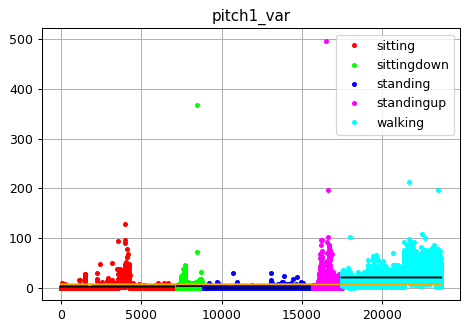

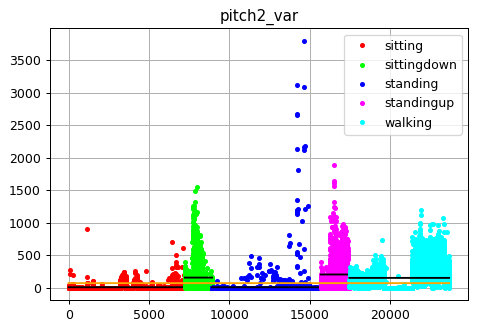

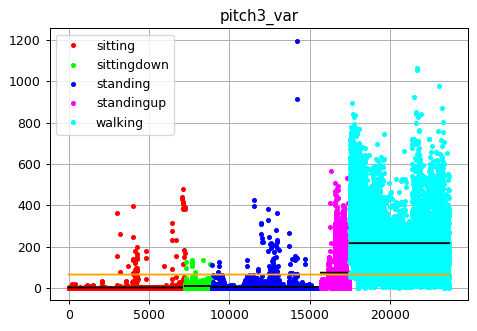

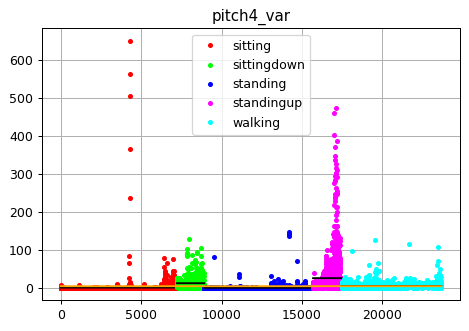

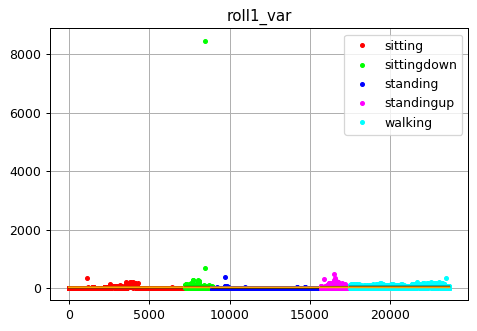

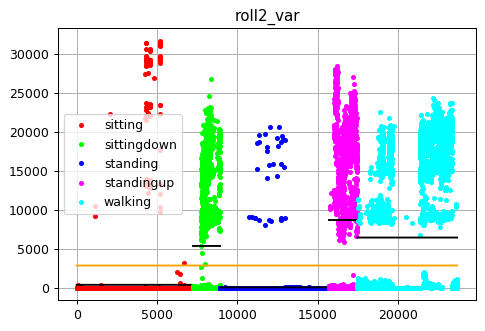

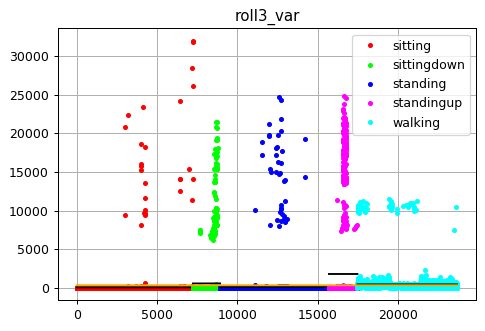

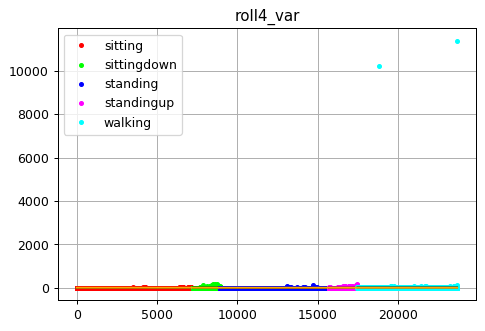

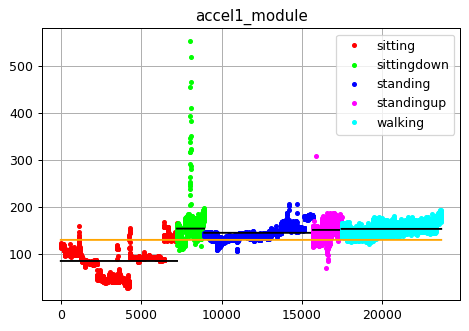

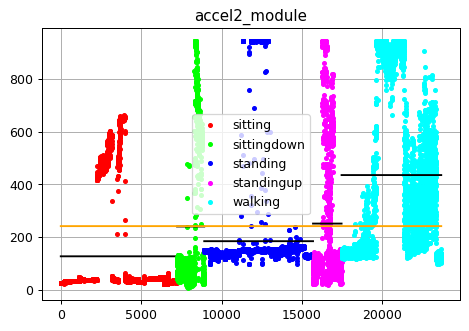

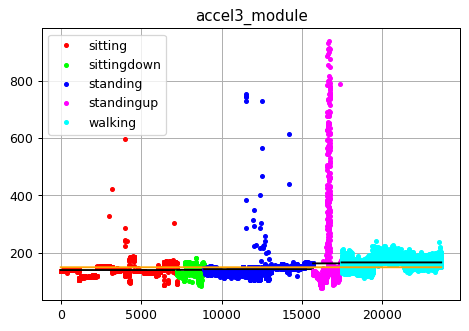

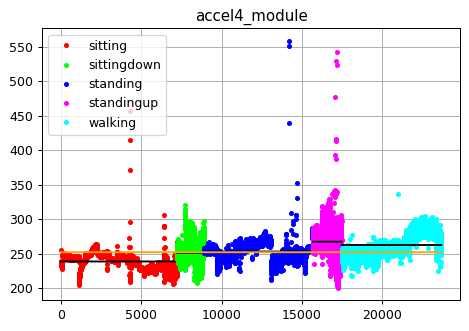

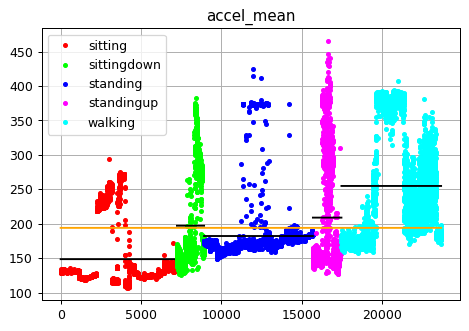

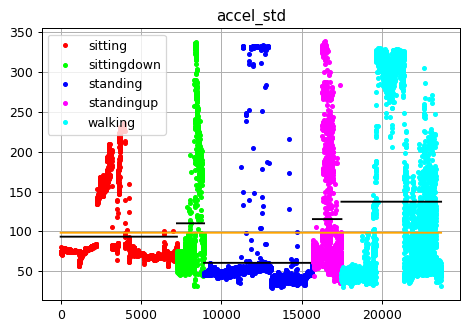

In [22]:
# Plot continuos

colors = ['#ff0000', '#00ff00', '#0000ff', '#ff00ff', '#00ffff']

for field in ['pitch1_var', 'pitch2_var', 'pitch3_var', 'pitch4_var', \
              'roll1_var', 'roll2_var', 'roll3_var', 'roll4_var', \
              'accel1_module', 'accel2_module', 'accel3_module', 'accel4_module', \
              'accel_mean', 'accel_std']:
    
    legend = []
    labels = []
    start_position = 0
    mean = np.mean(avg_df[field])
    for k, class_action in enumerate(avg_df['class'].unique()):
        class_df = avg_df.loc[avg_df['class'] == class_action]
        class_mean = np.mean(class_df[field])
        field_by_class = class_df[field]
        positions = list(range(start_position, start_position + (len(field_by_class))))
        legend.append(plt.plot(positions, field_by_class, color = colors[k], linestyle = ' ', marker = '.')[0])
        plt.plot(positions, [class_mean]*len(positions), color = 'black')
        start_position += len(field_by_class)
        labels.append(class_action)
    plt.plot(list(range(len(avg_df))), [mean]*len(avg_df), color = 'orange')
    
    plt.grid(True)
    #plt.yscale('log')
    plt.title(field)
    plt.legend(legend, labels)
    plt.savefig(f'graphs/{field}.png', dpi = 180)
    plt.show()

In [23]:
# Print continuos mean

for field in ['pitch1_var', 'pitch2_var', 'pitch3_var', 'pitch4_var', \
              'roll1_var', 'roll2_var', 'roll3_var', 'roll4_var', \
              'accel1_module', 'accel2_module', 'accel3_module', 'accel4_module', \
              'accel_mean', 'accel_std']:
    
    print(f"\n{field} \t{avg_df[field].mean()}")
    for class_action in avg_df['class'].unique():
        class_df = avg_df.loc[avg_df['class'] == class_action]
        print(f"{class_action} \t{class_df[field].mean()}")


pitch1_var 	7.349272644819336
sitting 	2.718287002937523
sittingdown 	3.8523983584812194
standing 	0.5543297243576812
standingup 	7.870737299738426
walking 	20.97502047440127

pitch2_var 	73.20671665682613
sitting 	10.445893148896493
sittingdown 	158.25750472737693
standing 	10.441391952557876
standingup 	206.05309657544763
walking 	153.74415600920855

pitch3_var 	64.64686543283902
sitting 	2.1859625675544905
sittingdown 	9.051026950359622
standing 	3.950597127017272
standingup 	73.514176241499
walking 	216.40697863277364

pitch4_var 	4.460439259857892
sitting 	0.8822758943722795
sittingdown 	12.364031667367659
standing 	0.3262657529723634
standingup 	25.63042893790671
walking 	4.93380238998739

roll1_var 	20.34270299778265
sitting 	11.90914098533391
sittingdown 	37.01414285218017
standing 	0.9934144235140006
standingup 	34.2986029648206
walking 	42.76806850775917

roll2_var 	2872.8100518542115
sitting 	394.8762228282967
sittingdown 	5382.6337406463845
standing 	74.71842231505778
stan

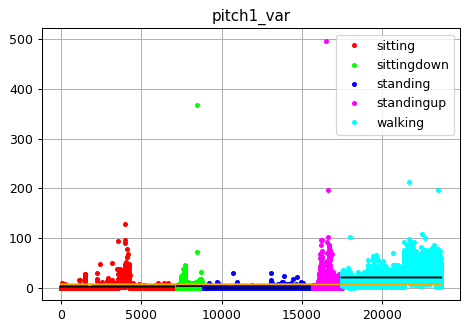

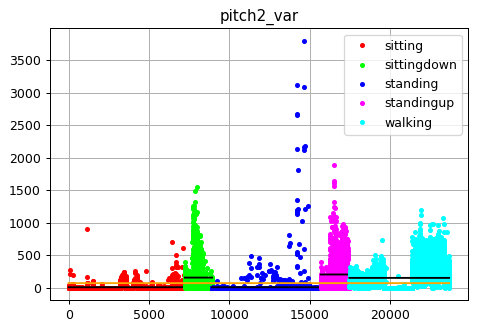

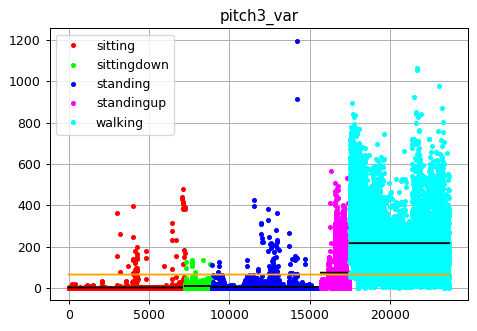

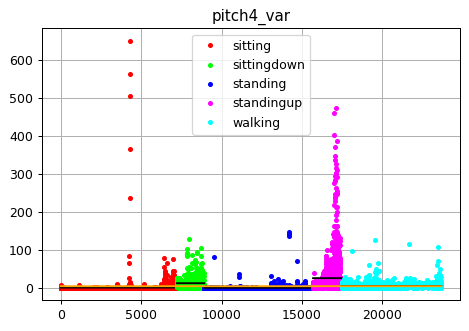

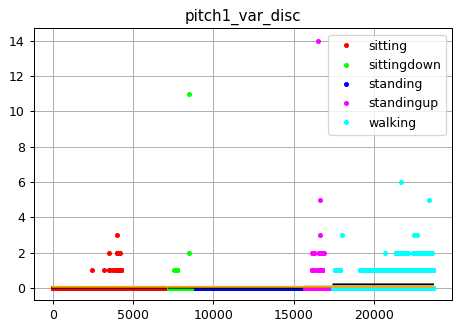

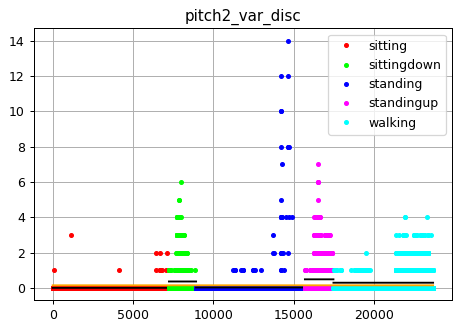

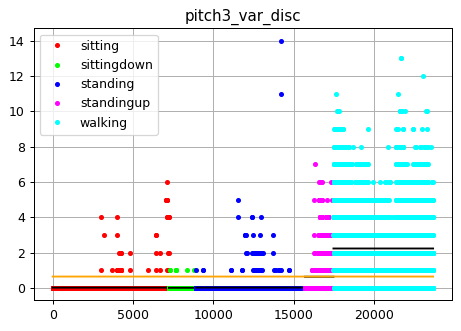

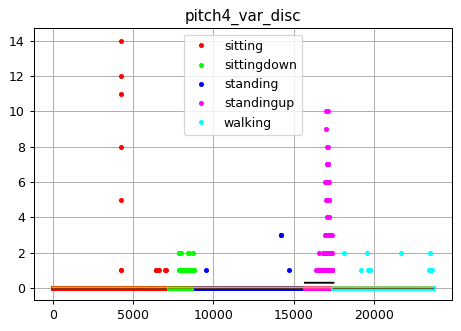

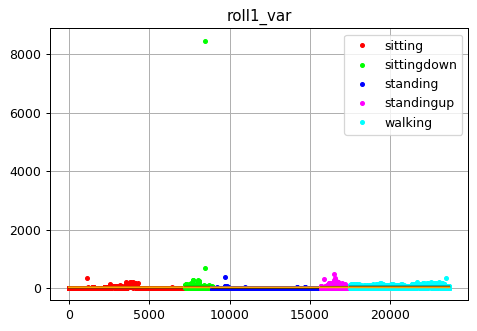

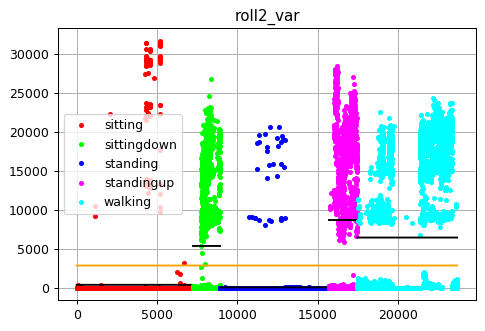

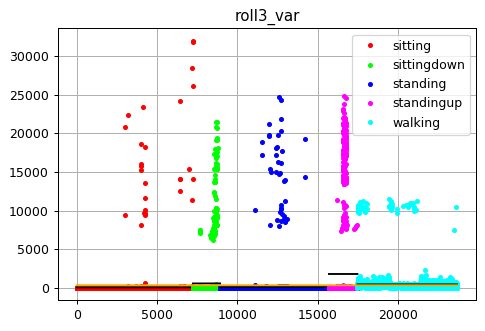

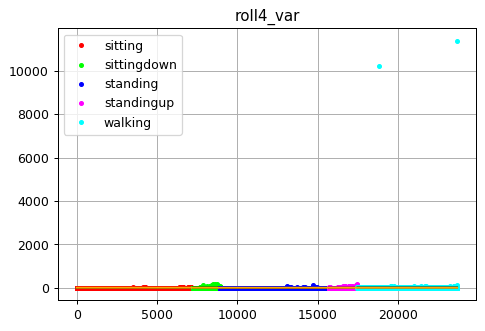

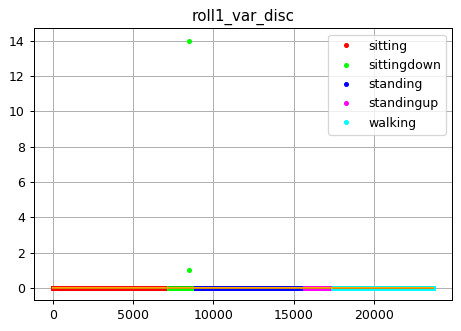

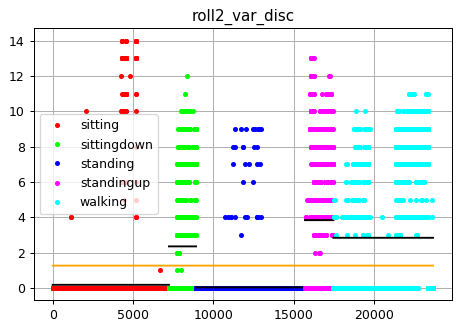

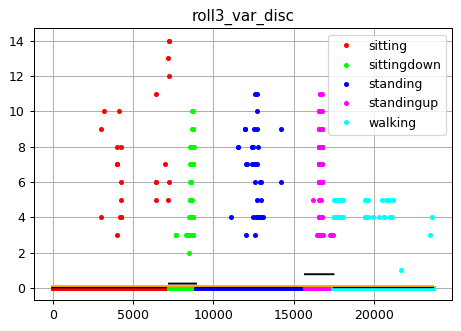

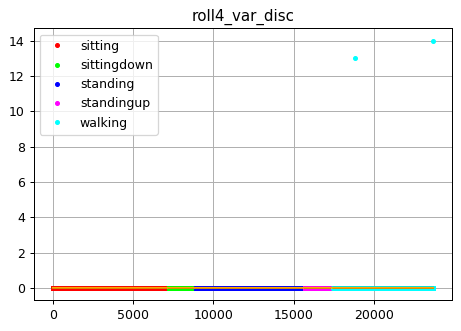

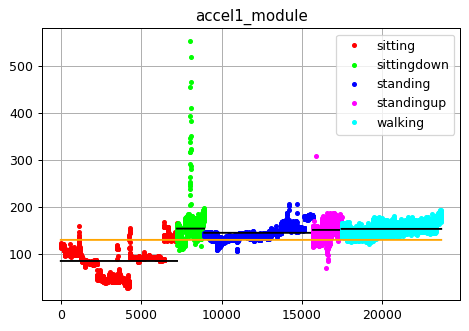

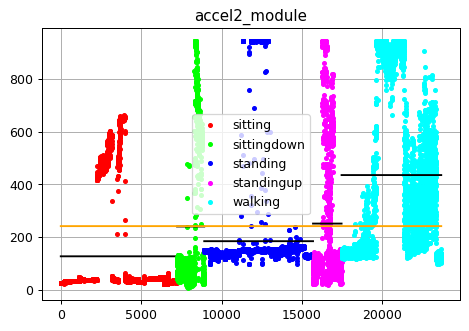

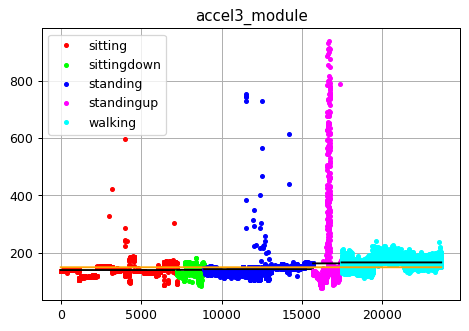

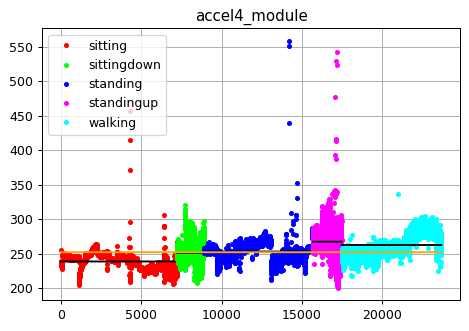

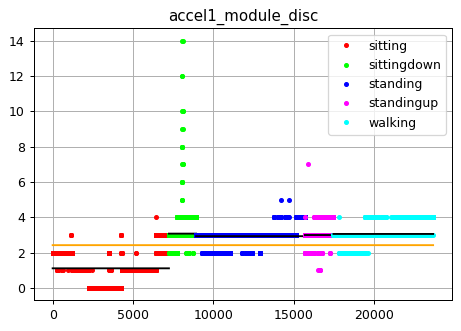

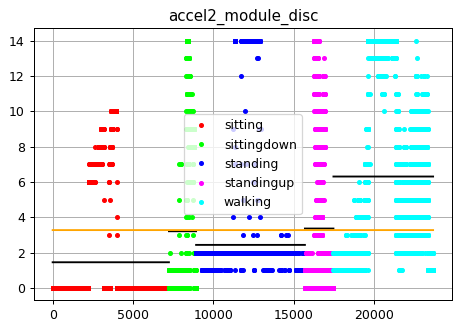

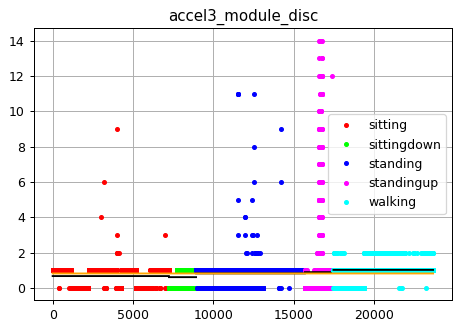

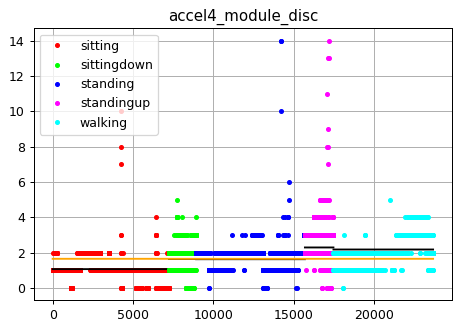

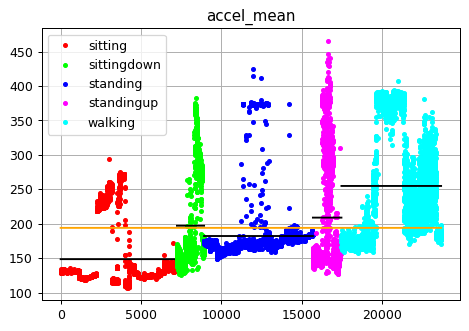

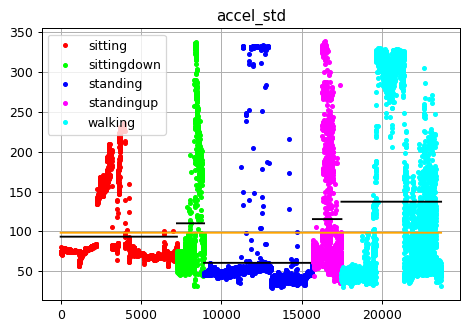

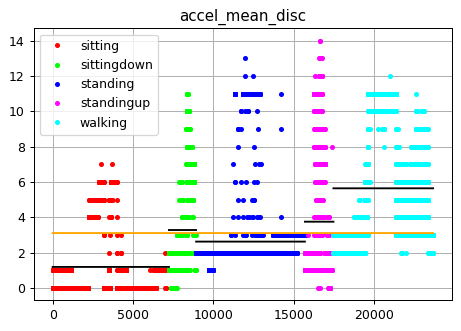

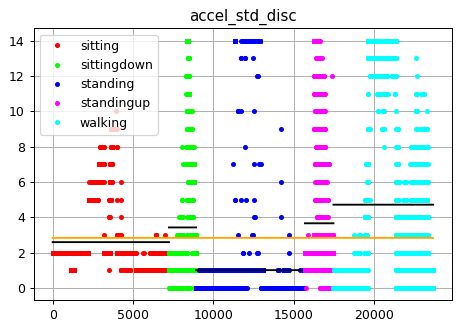

In [24]:
# Plot continuos and discontinuos
colors = ['#ff0000', '#00ff00', '#0000ff', '#ff00ff', '#00ffff']


for field in ['pitch1_var', 'pitch2_var', 'pitch3_var', 'pitch4_var', \
              'pitch1_var_disc', 'pitch2_var_disc', 'pitch3_var_disc', 'pitch4_var_disc', \
              'roll1_var', 'roll2_var', 'roll3_var', 'roll4_var', \
              'roll1_var_disc', 'roll2_var_disc', 'roll3_var_disc', 'roll4_var_disc', \
              'accel1_module', 'accel2_module', 'accel3_module', 'accel4_module', \
              'accel1_module_disc', 'accel2_module_disc', 'accel3_module_disc', 'accel4_module_disc', \
              'accel_mean', 'accel_std', 'accel_mean_disc', 'accel_std_disc']:
    
    legend = []
    labels = []
    start_position = 0
    mean = np.mean(avg_df[field])
    for k, class_action in enumerate(avg_df['class'].unique()):
        class_df = avg_df.loc[avg_df['class'] == class_action]
        class_mean = np.mean(class_df[field])
        field_by_class = class_df[field]
        positions = list(range(start_position, start_position + (len(field_by_class))))
        legend.append(plt.plot(positions, field_by_class, color = colors[k], linestyle = ' ', marker = '.')[0])
        plt.plot(positions, [class_mean]*len(positions), color = 'black')
        start_position += len(field_by_class)
        labels.append(class_action)
    plt.plot(list(range(len(avg_df))), [mean]*len(avg_df), color = 'orange')
    
    plt.grid(True)
    #plt.yscale('log')
    plt.title(field)
    plt.legend(legend, labels)
    plt.savefig(f'graphs/{field}.png', dpi = 180)
    plt.show()

In [25]:
# Print coninuos and discontinuos mean

for field in ['pitch1_var', 'pitch2_var', 'pitch3_var', 'pitch4_var', \
              'pitch1_var_disc', 'pitch2_var_disc', 'pitch3_var_disc', 'pitch4_var_disc', \
              'roll1_var', 'roll2_var', 'roll3_var', 'roll4_var', \
              'roll1_var_disc', 'roll2_var_disc', 'roll3_var_disc', 'roll4_var_disc', \
              'accel1_module', 'accel2_module', 'accel3_module', 'accel4_module', \
              'accel1_module_disc', 'accel2_module_disc', 'accel3_module_disc', 'accel4_module_disc', \
              'accel_mean', 'accel_std', 'accel_mean_disc', 'accel_std_disc']:
    
    print(f"\n{field} \t{avg_df[field].mean()}")
    for class_action in avg_df['class'].unique():
        class_df = avg_df.loc[avg_df['class'] == class_action]
        print(f"{class_action} \t{class_df[field].mean()}")


pitch1_var 	7.349272644819336
sitting 	2.718287002937523
sittingdown 	3.8523983584812194
standing 	0.5543297243576812
standingup 	7.870737299738426
walking 	20.97502047440127

pitch2_var 	73.20671665682613
sitting 	10.445893148896493
sittingdown 	158.25750472737693
standing 	10.441391952557876
standingup 	206.05309657544763
walking 	153.74415600920855

pitch3_var 	64.64686543283902
sitting 	2.1859625675544905
sittingdown 	9.051026950359622
standing 	3.950597127017272
standingup 	73.514176241499
walking 	216.40697863277364

pitch4_var 	4.460439259857892
sitting 	0.8822758943722795
sittingdown 	12.364031667367659
standing 	0.3262657529723634
standingup 	25.63042893790671
walking 	4.93380238998739

pitch1_var_disc 	0.06012337333107994
sitting 	0.006773569256289743
sittingdown 	0.011242603550295858
standing 	0.0
standingup 	0.06422535211267606
walking 	0.20016129032258065

pitch2_var_disc 	0.14716072333953018
sitting 	0.0026264860381531654
sittingdown 	0.36272189349112427
standing 	0.0251

### Compare 'accel_mean' and 'accel_module'

In [21]:
compare = {}
for accel in ['accel1', 'accel2', 'accel3', 'accel4']:
    mean = avg_df[f'{accel}_mean']
    module = avg_df[f'{accel}_module']

    compare[accel] = pd.Series(mean-module).sort_values(ascending = False)

### Distribution of classes by user

In [306]:
n_instance = df.loc[df['class'] == 'sitting'].shape[0]
df.loc[df['class'] == 'sitting']['user'].value_counts()/n_instance*100

debora         30.840789
wallace        29.612293
katia          28.204065
jose_carlos    11.342853
Name: user, dtype: float64

In [74]:
n_instance = df.loc[df['class'] == 'standing'].shape[0]
df.loc[df['class'] == 'standing']['user'].value_counts()/n_instance*100

debora         31.538949
wallace        30.540426
katia          30.048554
jose_carlos     7.872071
Name: user, dtype: float64

In [34]:
n_instance = df.loc[df['class'] == 'walking'].shape[0]
df.loc[df['class'] == 'walking']['user'].value_counts()/n_instance*100

wallace        32.350772
debora         31.394330
katia          31.242222
jose_carlos     5.012676
Name: user, dtype: float64

In [32]:
n_instance = df.loc[df['class'] == 'standingup'].shape[0]
df.loc[df['class'] == 'standingup']['user'].value_counts()/n_instance*100

wallace        33.145389
debora         31.035038
katia          29.883206
jose_carlos     5.936367
Name: user, dtype: float64

In [30]:
n_instance = df.loc[df['class'] == 'sittingdown'].shape[0]
df.loc[df['class'] == 'sittingdown']['user'].value_counts()/n_instance*100

katia          33.964657
debora         29.990699
wallace        29.474930
jose_carlos     6.569713
Name: user, dtype: float64

### Some plot

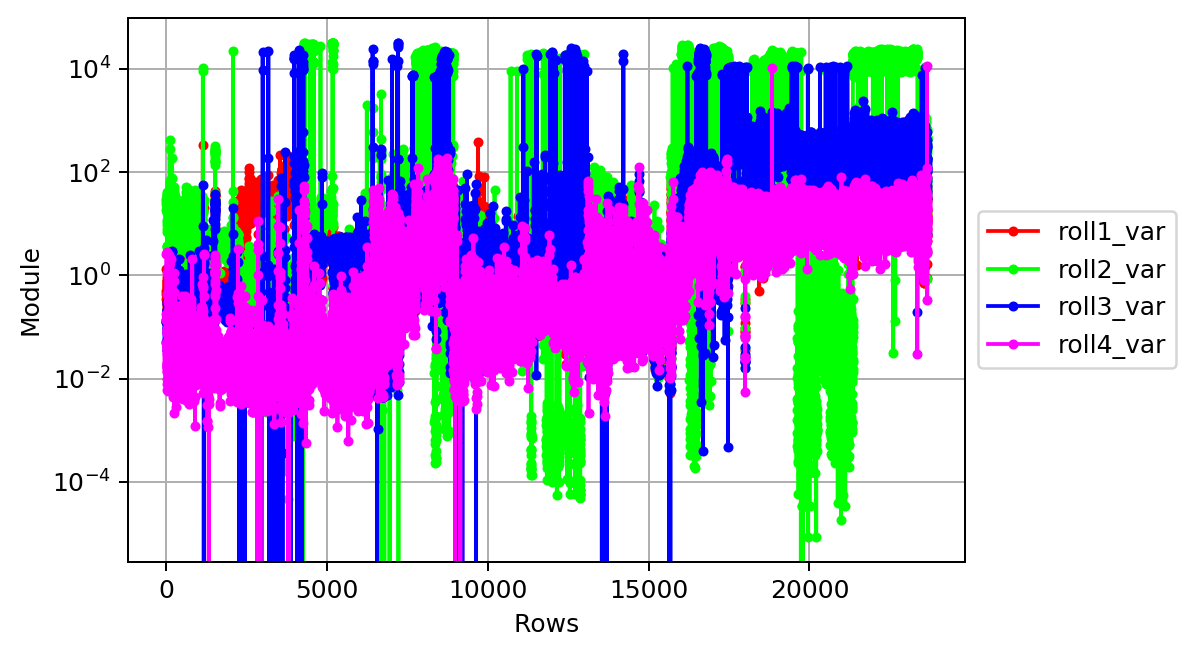

In [141]:
fields = ['roll1_var', 'roll2_var', 'roll3_var', 'roll4_var']
colors = ['#ff0000', '#00ff00', '#0000ff', '#ff00ff']
legend = []
labels = []

for k, field in enumerate(fields):
    legend.append(plt.plot(list(range(avg_df.shape[0])), list(avg_df[field]), \
                           linestyle = '-', marker = '.', color = colors[k])[0])
    labels.append(field)
 
    
plt.grid(True)
plt.yscale("log")
plt.legend(legend, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Module")
plt.xlabel("Rows")
plt.show()